[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/johanhoffman/DD2363-VT20/tree/viktorme/Lab-3/lab3_iterativemethods.ipynb]

# Lab 3: Iterative methods #
**Viktor Meyer - DD2363 Methods in Scientific Computing**

# **Abstract**
This lab is an exercise in iterative methods. The mandatory part includes Jacobi iteration, Gauss-Seidel iteration, Newton's method for scalar nonlinear equation f(x)=0. There is also an extra assignment GMRES method or Newton's method for vector nonlinear equation f(x)=0.

# **Environment**
To have access to the neccessary modules you have to run this cell.

In [1]:
# Load neccessary modules.
#from google.colab import files

import time
import numpy as np
from scipy import optimize
from scipy.misc import derivative

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes

# **Introduction**
The methods to be implemented were covered in the during lectures and definitions are available in the lecture notes. The aim of this lab is to approach the problem of solving systems of linear equations using iterative methods. The iterative methods are generally fast with a low memory footprint while generally yielding acceptable approximate solutions to large systems.  
> LN-DD2363-part4.pdf, p. 127

# **Methods**

### Jacobi iteration, Ax=b ###

Jacobi iteration is a fixed point iteration method using matrix splitting. The method typically starts with an initial guess where all components of x are zero. In each iteration, the method updates x with new changes that aim to closer approximate a correct solution.
> LN-DD2363-part4.pdf, pp. 130-133
> https://www.maa.org/press/periodicals/loci/joma/iterative-methods-for-solving-iaxi-ibi-jacobis-method

In [2]:
def jacobi(A, b, iterations = 1000):
    
    #Diagonal from A, apply reciprocal, this is equal to (D-1)
    di = np.diag(np.array(np.reciprocal(A.diagonal().copy().astype(float))).ravel())
    
    #Clear the diagonal we extracted from A, this is equal to (L+U)
    np.fill_diagonal(A, 0)
    
    #Invert each element in A
    A *= -1
    
    solution = np.matrix(np.zeros(b.shape))
    for i in range(iterations):
        solution = di*(A*solution+b)
    
    return solution

### Gauss-Seidel iteration, Ax=b ###
Gauss-Seidel iteration shares a lot in common with Jacobi iteration, the main difference is in how changes to x are made. Recall that Jacobi iteration only applies updates to all components of x AFTER each iteration. Gauss-Sediel improves upon this by updating each component of x AS SOON AS POSSIBLE, likely leading to faster convergence rates.
> LN-DD2363-part4.pdf, pp. 130-133
> https://www.maa.org/press/periodicals/loci/joma/iterative-methods-for-solving-iaxi-ibi-gauss-seidel-method

In [3]:
def gaussseidel(A, b, iterations = 1000):
    
    LD = np.tril(A) 
    
    U = A-LD

    x = np.matrix(np.zeros(b.shape))
    for i in range(iterations):
        x = np.linalg.inv(LD)*(-1*U*x+b)
    
    return x

### Newton's method for scalar nonlinear equations, f(x)=0###

Newton's method is an approach to solving nonlinear scalar equations. The general idea is to use an initial guess and progressively improve over time. Improvements are made by using the derivative as guide in each iteration.

> LN-DD2363-part4.pdf, pp. 147-149

In [4]:
def newtonsmethod(f, x0, iterations):
    x = x0
    for i in range(iterations):
        df = derivative(f, x)
        x -= (f(x)/df) 
    return x

# **Results**

### Jacobi iteration, Ax=b ###

Below are tests for Jacobi iteration. Input A and b are given such that there exists an exact solution y for x under the condition of Ax=b. This means that the test explores convergence ||Ax-b|| and the approximation error ||x-y|| at the same time.

Using:
A=
[[ 4 -1 -1]
 [-2  6  1]
 [-1  1  7]]
b=
[[ 3]
 [ 9]
 [-6]]
Converged in 18:
x=
[[ 0.99999999]
 [ 2.00000001]
 [-0.99999999]]
|error|=
9.877244466771629e-09


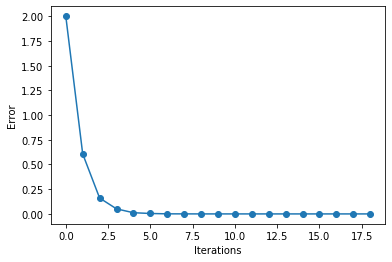

In [5]:
def jacobi_plot():
    
  iterations = np.array([])
  errors = np.array([])
  
  A = np.matrix("4 -1 -1; -2 6 1; -1 1 7")
  b = np.matrix("3; 9; -6")
  trueresult = np.linalg.solve(A, b)

  for n in range(32):
      
    result = jacobi(A.copy(), b, n)
    
    error = np.abs(np.sum(result-trueresult))
    
    iterations = np.append(iterations, n)
    errors = np.append(errors, error)
      
    if np.isclose(error, 0):
        print("Using:")
        print(f"A=\n{A}")
        print(f"b=\n{b}")
        print(f"Converged in {n}:")
        print(f"x=\n{result}")
        print(f"|error|=\n{error}")
        break

  plt.figure()
  plt.xlabel('Iterations')
  plt.ylabel('Error')
  plt.plot(iterations, errors, 'o-')

jacobi_plot()

We find that Jacobi iteration yields an approximate solution in 18 iterations where the solution is very close to zero.

### Gauss-Seidel iteration, Ax=b ###

Below are tests for Gauss-Seidel iteration. Input A and b are given such that there exists an exact solution y for x under the condition of Ax=b. This means that the test explores convergence ||Ax-b|| and the approximation error ||x-y|| at the same time.

Using:
A=
[[ 4 -1 -1]
 [-2  6  1]
 [-1  1  7]]
b=
[[ 3]
 [ 9]
 [-6]]
Converged in 9:
x=
[[ 1.]
 [ 2.]
 [-1.]]
|error|=
1.8414112457065812e-09


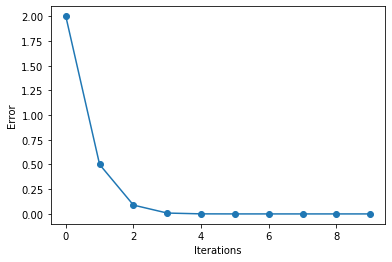

In [6]:
def gaussseidel_plot():
    
  iterations = np.array([])
  errors = np.array([])
  
  A = np.matrix("4 -1 -1; -2 6 1; -1 1 7")
  b = np.matrix("3; 9; -6")
  trueresult = np.linalg.solve(A, b)

  for n in range(32):
      
    result = gaussseidel(A.copy(), b, n)
    
    error = np.abs(np.sum(result-trueresult))
    
    iterations = np.append(iterations, n)
    errors = np.append(errors, error)
      
    if np.isclose(error, 0):
        print("Using:")
        print(f"A=\n{A}")
        print(f"b=\n{b}")
        print(f"Converged in {n}:")
        print(f"x=\n{result}")
        print(f"|error|=\n{error}")
        break

  plt.figure()
  plt.xlabel('Iterations')
  plt.ylabel('Error')
  plt.plot(iterations, errors, 'o-')

gaussseidel_plot()

We find that Gauss-Seidel iteration yields an approximate solution in 18 iterations where the solution is very close to zero. It is important to note the improvement in convergence speed, compared to the Jacobi iteration method, Gauss-Seidel is twice as fast!

### Newton's method, f(x)=0 ###

Below are tests for Newton's method. Input function f(x) is specified such that there exists an exact solution y for f(x)=0. This means that the test explores convergence ||f(x)|| and the approximation error ||x-y|| at the same time.

Using:
fn=
lambda
Converged in 12:
x=
-2.0000000062094836
|error|=
6.2094835939774384e-09


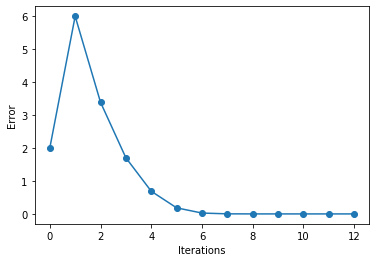

In [7]:
def newtonsmethod_plot():
    
  iterations = np.array([])
  errors = np.array([])

  x0 = 0.0
  fn = lambda x : x**3+8
  trueresult = optimize.root_scalar(fn, bracket=[-10, 10]).root

  for n in range(128):
      
    result = newtonsmethod(fn, x0, n)
    
    error = np.abs(result-trueresult)
    
    iterations = np.append(iterations, n)
    errors = np.append(errors, error)
      
    if np.isclose(error, 0):
        print("Using:")
        print(f"fn=\nlambda")
        print(f"Converged in {n}:")
        print(f"x=\n{result}")
        print(f"|error|=\n{error}")
        break

  plt.figure()
  plt.xlabel('Iterations')
  plt.ylabel('Error')
  plt.plot(iterations, errors, 'o-')

newtonsmethod_plot()

We find that Newton's method yields an approximate solution in 12 iterations where the solution is very close to zero. It is interesting to see that the approximation error actually increases in the beginning and then rapidly decreases.

# **Discussion**

This lab showed that iterative methods can be highly effective in solving equations. They are definitely an alternative to consider in comparison with the direct methods previously explored.